In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## KNN algorithm is multi-class classification

In [ ]:
df=pd.read_csv('/content/drug200.csv')

In [ ]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
print('BP is:',df['BP'].unique())
print('Cholestrol is:',df['Cholesterol'].unique())
print('Drug is:',df['Drug'].unique())

BP is: ['HIGH' 'LOW' 'NORMAL']
Cholestrol is: ['HIGH' 'NORMAL']
Drug is: ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [ ]:
df['Cholesterol']=df['Cholesterol'].map({'HIGH':1,'NORMAL':0}).astype(int)

In [ ]:
df['BP']=df['BP'].map({'HIGH':2,'LOW':0,'NORMAL':1}).astype(int)

In [ ]:
df['Sex']=df['Sex'].map({'F':1,'M':0}).astype(int)

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,drugY
1,47,0,0,1,13.093,drugC
2,47,0,0,1,10.114,drugC
3,28,1,1,1,7.798,drugX
4,61,1,0,1,18.043,drugY


In [ ]:
x=df.iloc[:,0:5].values
y=df.iloc[:,-1:].values

In [ ]:
x

array([[23.   ,  1.   ,  2.   ,  1.   , 25.355],
       [47.   ,  0.   ,  0.   ,  1.   , 13.093],
       [47.   ,  0.   ,  0.   ,  1.   , 10.114],
       [28.   ,  1.   ,  1.   ,  1.   ,  7.798],
       [61.   ,  1.   ,  0.   ,  1.   , 18.043],
       [22.   ,  1.   ,  1.   ,  1.   ,  8.607],
       [49.   ,  1.   ,  1.   ,  1.   , 16.275],
       [41.   ,  0.   ,  0.   ,  1.   , 11.037],
       [60.   ,  0.   ,  1.   ,  1.   , 15.171],
       [43.   ,  0.   ,  0.   ,  0.   , 19.368],
       [47.   ,  1.   ,  0.   ,  1.   , 11.767],
       [34.   ,  1.   ,  2.   ,  0.   , 19.199],
       [43.   ,  0.   ,  0.   ,  1.   , 15.376],
       [74.   ,  1.   ,  0.   ,  1.   , 20.942],
       [50.   ,  1.   ,  1.   ,  1.   , 12.703],
       [16.   ,  1.   ,  2.   ,  0.   , 15.516],
       [69.   ,  0.   ,  0.   ,  0.   , 11.455],
       [43.   ,  0.   ,  2.   ,  1.   , 13.972],
       [23.   ,  0.   ,  0.   ,  1.   ,  7.298],
       [32.   ,  1.   ,  2.   ,  0.   , 25.974],
       [57.   ,  0. 

In [ ]:
y

array([['drugY'],
       ['drugC'],
       ['drugC'],
       ['drugX'],
       ['drugY'],
       ['drugX'],
       ['drugY'],
       ['drugC'],
       ['drugY'],
       ['drugY'],
       ['drugC'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugX'],
       ['drugY'],
       ['drugX'],
       ['drugA'],
       ['drugC'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugX'],
       ['drugY'],
       ['drugY'],
       ['drugX'],
       ['drugB'],
       ['drugX'],
       ['drugY'],
       ['drugX'],
       ['drugX'],
       ['drugA'],
       ['drugX'],
       ['drugX'],
       ['drugX'],
       ['drugY'],
       ['drugB'],
       ['drugY'],
       ['drugX'],
       ['drugX'],
       ['drugX'],
       ['drugA'],
       ['drugC'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugX'],
       ['drugY'],
       ['drugY'],
       ['drugB'],
       ['d

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(xtrain,ytrain)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy_score for training is:',accuracy_score(ytrain,knn_classifier.predict(xtrain)))
print('accuracy_score for testing is:',accuracy_score(ytest,knn_classifier.predict(xtest)))

accuracy_score for training is: 0.775
accuracy_score for testing is: 0.725


 we can implement multi-class  classification in confusion matrix but it doesnot contains fn,fp along with diagnoal was considered as correct 



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,knn_classifier.predict(xtest))

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


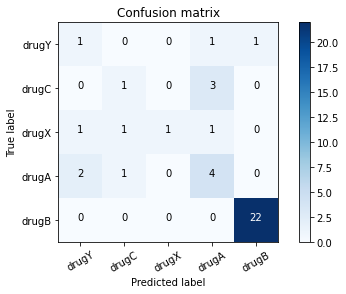

In [ ]:
classes=['drugY','drugC','drugX','drugA','drugB']
plt.plot(figsize=(6,6),dpi=30)
plot_confusion_matrix(cm,classes)

In [ ]:
acc_train=[]
acc_test=[]
for i in range(1,21):
  knn_classifier=KNeighborsClassifier(n_neighbors=i)
  knn_classifier.fit(xtrain,ytrain)
  acc_train.append(accuracy_score(ytrain,knn_classifier.predict(xtrain)))
  acc_test.append(accuracy_score(ytest,knn_classifier.predict(xtest)))



'\nFrom graph we can understand that low values in training_accuracy contains high variance in testing_accuracy and high values in training_accuracy contains low variance means high bias\nthe best fit value in this KNN is where training and testing accuracy coincides i.e,3\n'

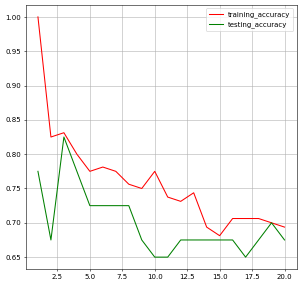

In [ ]:
x=list(range(1,21))
plt.figure(figsize=(7,7),dpi=50)
plt.plot(x,acc_train,color='red',label='training_accuracy')
plt.plot(x,acc_test,color='green',label='testing_accuracy')
plt.legend()
plt.grid()
'''
From graph we can understand that low values in training_accuracy contains high variance in testing_accuracy and high values in training_accuracy contains low variance means high bias
the best fit value in this KNN is where training and testing accuracy coincides i.e,3
'''
